In [2]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# load our data
data = pd.read_csv('car.data')

# take a look on the data
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [4]:
# Specify our labels and Features
X = data[[
    'buying',
    'maint',
    'safety'
]]

y = data[['class']]

print(X, y)

X = data[[
    'buying',
    'maint',
    'safety'
]].values           # for encoding

     buying  maint safety
0     vhigh  vhigh    low
1     vhigh  vhigh    med
2     vhigh  vhigh   high
3     vhigh  vhigh    low
4     vhigh  vhigh    med
...     ...    ...    ...
1723    low    low    med
1724    low    low   high
1725    low    low    low
1726    low    low    med
1727    low    low   high

[1728 rows x 3 columns]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


In [5]:
# Encode X
# convert our data from text to numbers to be used by sklearn dor ML

LE = LabelEncoder()
for i in range(len(X[0])):      # loop on each row
    X[:, i] = LE.fit_transform(X[:, i ])        # loop on each feature(column) and give it a number

print(X)

[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


In [6]:
# Encode Y
# map each output of y to a specific number

label_maping = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3,
}

y['class'] = y['class'].map(label_maping)

print(y)



# put y in array to work on 
y = np.array(y)
print(y)

      class
0         0
1         0
2         0
3         0
4         0
...     ...
1723      2
1724      3
1725      0
1726      2
1727      3

[1728 rows x 1 columns]
[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


C:\Users\DELL\AppData\Local\Temp\ipykernel_17244\1446425343.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(label_maping)


In [7]:
# split our data to train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Create our model

KNN = neighbors.KNeighborsClassifier(n_neighbors=11, weights='uniform')


In [9]:
# fit(train) our model

KNN.fit(X_train, y_train)

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [10]:
# Test our model

predict = KNN.predict(X_test)

# Calc our accuracy

acc = metrics.accuracy_score(y_test, predict)
print(acc)

0.7514450867052023


In [11]:
# Just to see the my results

Var = 345       #any cell in the table
print("Actual data: ", y[Var])
print("My prediction: ", KNN.predict(X)[Var])

Actual data:  [0]
My prediction:  0


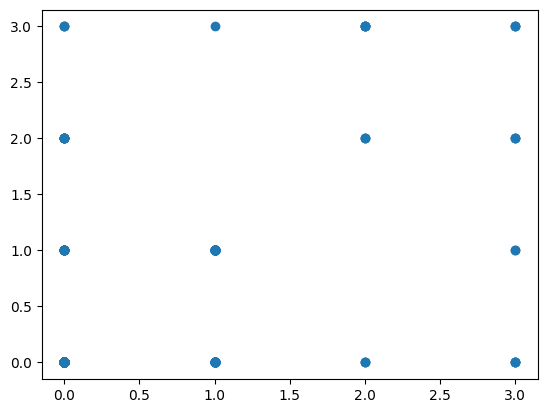

In [13]:
import matplotlib.pylab as plt

plt.scatter(predict, y_test)